# A demonstration of oslo_method_python as of January 2019


Before this notebook is run on a new system, make sure to compile the Cython files by doing (in the top repo directory):

```python setup.py build_ext --inplace```

In [12]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.insert(0,"../")
import oslo_method_python as om
import copy
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


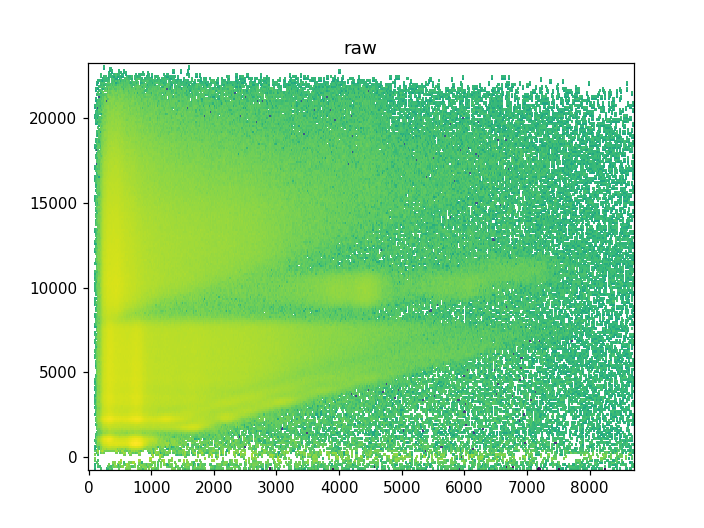

In [13]:
# Import raw matrix into instance of om.Matrix() and plot it
fname_raw = "../tests/Dy164_raw.m"
raw = om.Matrix()
raw.load(fname_raw)
raw.plot(title="raw")

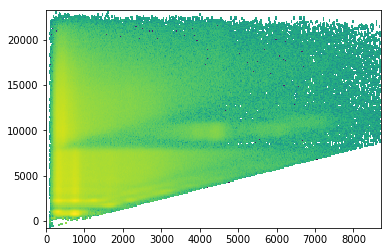

In [3]:
# Cut away diagonal
Ex1 = 0
Eg1 = 800
E1 = [Ex1, Eg1]
Ex2 = 7300
Eg2 = 7500
E2 = [Ex2, Eg2]
#raw_diagcut = copy.copy(raw)
#raw_diagcut.matrix = om.cut_diagonal(raw.matrix, raw.E0_array, raw.E1_array, E1, E2)
raw.cut_diagonal(E1, E2)
raw.plot()

<IPython.core.display.Javascript object>


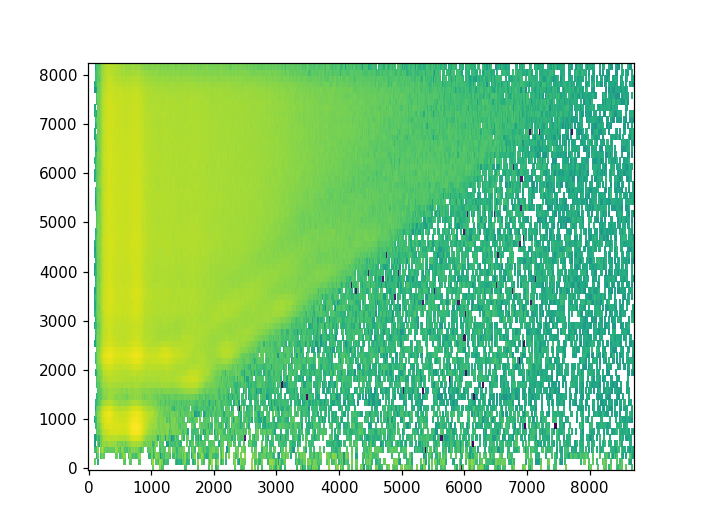

In [14]:
# Drop Ex larger than Sn, about 8300 keV
raw.cut_rect(axis=0, E_limits=[0, 8400])
raw.plot()

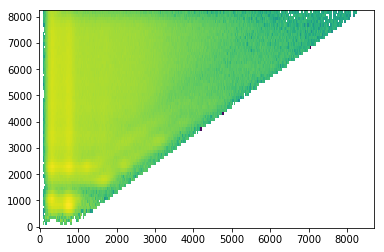

In [5]:
# Put it into an instance of om.MatrixAnalysis() to do unfolding and first generation method:
ma = om.MatrixAnalysis()
ma.raw = raw
ma.raw.plot()

<IPython.core.display.Javascript object>


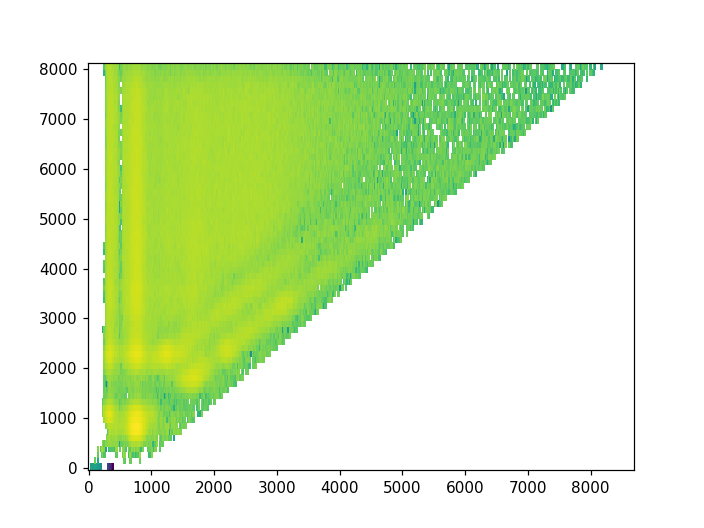

In [15]:
# Unfold the matrix. 
# I haven't implemented a fast enough routine for response function interpolation yet,
# so we have to load response functions with the right calibration, made by MAMA, from file.
fname_resp_mat = "../tests/Dy164_response_matrix.m"
fname_resp_dat = "../tests/Dy164_response_parameters.dat"

# Call the unfolding algorithm:
diag_cut = {"Ex1": 0, "Eg1": 800, "Ex2": 7300, "Eg2": 7500}
ma.unfold(fname_resp_dat=fname_resp_dat, fname_resp_mat=fname_resp_mat, diag_cut=diag_cut)
# The result is stored in the Matrix() instance ma.unfolded. Plot it:
ma.unfolded.plot()

Hello from the fill_negative() function. Please debug me.
-867.3435157638797


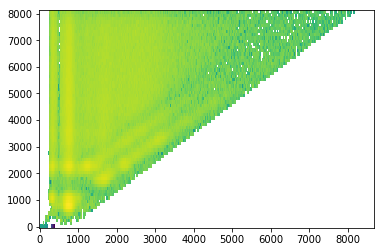

In [7]:
# Fill negative (this function requires debugging and improvements)
ma.unfolded.fill_negative(window_size=4)
print(ma.unfolded.matrix.min())
ma.unfolded.plot()

0.0


<IPython.core.display.Javascript object>


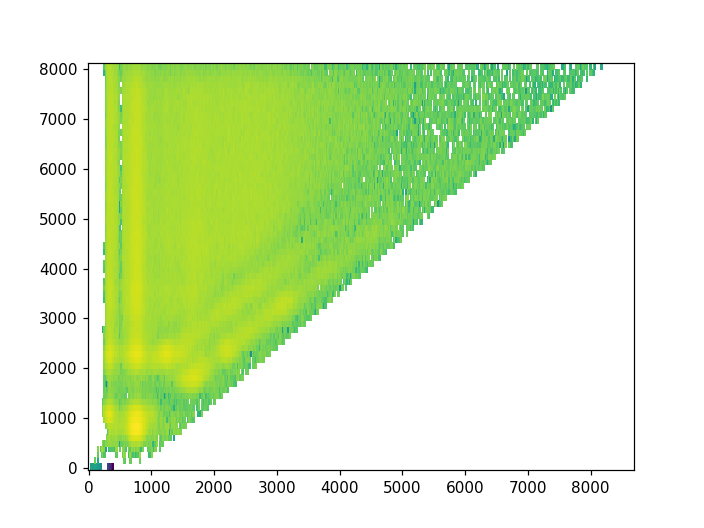

In [16]:
# Remove negatives remaining
ma.unfolded.remove_negative()
print(ma.unfolded.matrix.min())
ma.unfolded.plot()

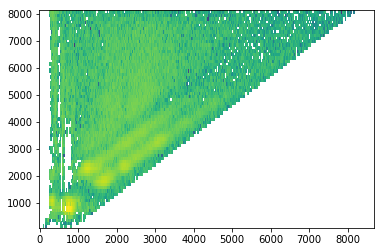

In [9]:
# Run first generation method
ma.first_generation_method(Ex_max = 8500, dE_gamma = 500)
ma.firstgen.plot(zmin=1e-3)

In [20]:
# Do error propagation in order to obtain an error matrix on the first generation spectrum
# Note that it requires an instance of MatrixAnalysis as input
ep = om.ErrorPropagation(ma, folder="error_propagation_ensemble", random_seed=481516)
ep.generate_ensemble(N_ensemble_members=10, randomness="poisson", purge_files=True)

=== Begin ensemble member  0  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  1  ===
Generating raw matrix
Unfolding matrix


../oslo_method_python/unfold.py:266: RuntimeWarning: invalid value encountered in true_divide
  fluctuations_matrix = fluctuations_matrix/fluctuations_vector_raw[:,None] # TODO check that this broadcasts the vector over the right dimension


Calculating first generation matrix
=== Begin ensemble member  2  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  3  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  4  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  5  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  6  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  7  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  8  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix
=== Begin ensemble member  9  ===
Generating raw matrix
Unfolding matrix
Calculating first generation matrix


<IPython.core.display.Javascript object>


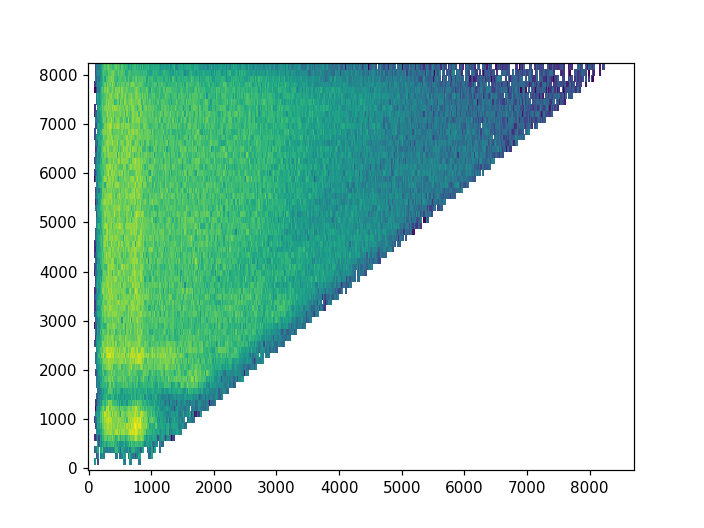

In [22]:
# Fetch and plot the standard deviation of raw:
std_raw = ep.std_raw
std_raw.plot()

<IPython.core.display.Javascript object>


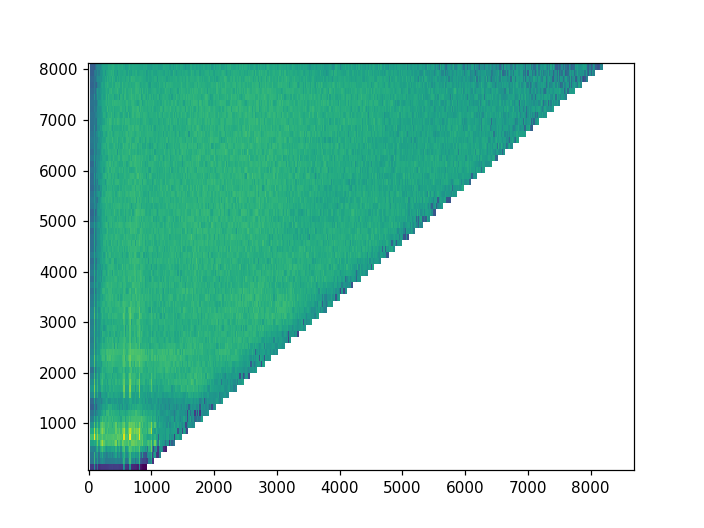

In [23]:
# Fetch and plot the standard deviation of firstgen:
std_firstgen = ep.std_firstgen
std_firstgen.plot()

../oslo_method_python/fit_rho_T.py:287: RuntimeWarning: overflow encountered in square
  chi2_matrix = div0((P_exp - P_fit)**2, P_err**2)
../oslo_method_python/library.py:479: RuntimeWarning: overflow encountered in true_divide
  c = np.true_divide(a, b )
/home/jorgenem/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2598: RuntimeWarning: overflow encountered in double_scalars
  t *= temp*temp
/home/jorgenem/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2600: RuntimeWarning: overflow encountered in double_scalars
  t -= delta*temp*temp
/home/jorgenem/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2600: RuntimeWarning: invalid value encountered in double_scalars
  t -= delta*temp*temp


Optimization terminated successfully.
         Current function value: 10599594447050139535735237236521083386424845294273214784532727602381536742546753535033009106063789012477282020279530341736029651890453435789473549751592791565009500353934714006476266431834069167770918596405433991168.000000
         Iterations: 3
         Function evaluations: 7403
res =    direc: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
     fun: 1.059959444705014e+214
 message: 'Optimization terminated successfully.'
    nfev: 7403
     nit: 3
  status: 0
 success: True
       x: array([-1.45825443e+01,  7.94893646e-01,  9.98556020e-01,  1.00000655e+00,
        9.99999876e-01,  9.99999928e-01,  9.99999845e-01,  9.99999906e-01,
        1.00000002e+00,  9.99999928e-01,  1.00000043e+00,  9.99999596e-01,
        9.99999893

True

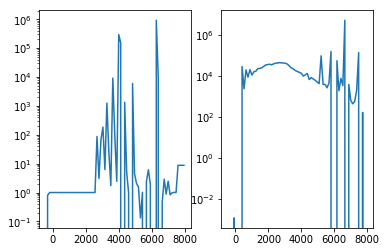

In [10]:
# Run fit to rho and T
# (This one needs some more bug testing...)

bin_width_out = 120
Ex_min = 3000
Ex_max = 8000
Eg_min = 1000

rho, T = om.fit_rho_T(ma.firstgen, bin_width_out,
                      Ex_min, Ex_max, Eg_min,
                      method="Powell",
                     )


f, (axrho, axT) = plt.subplots(1,2)
rho.plot(ax=axrho, yscale="log")
T.plot(ax=axT, yscale="log")